### Score: 44

Q1.[4+4+5]

Q2.[9+10]

Q3.[5+7]

In [7]:
#PS3-1
# Import modules
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Open the netCDF4 file
ds = xr.open_dataset(r"C:\Users\zjm\Desktop\ESE_5023\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")

# Check the data
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

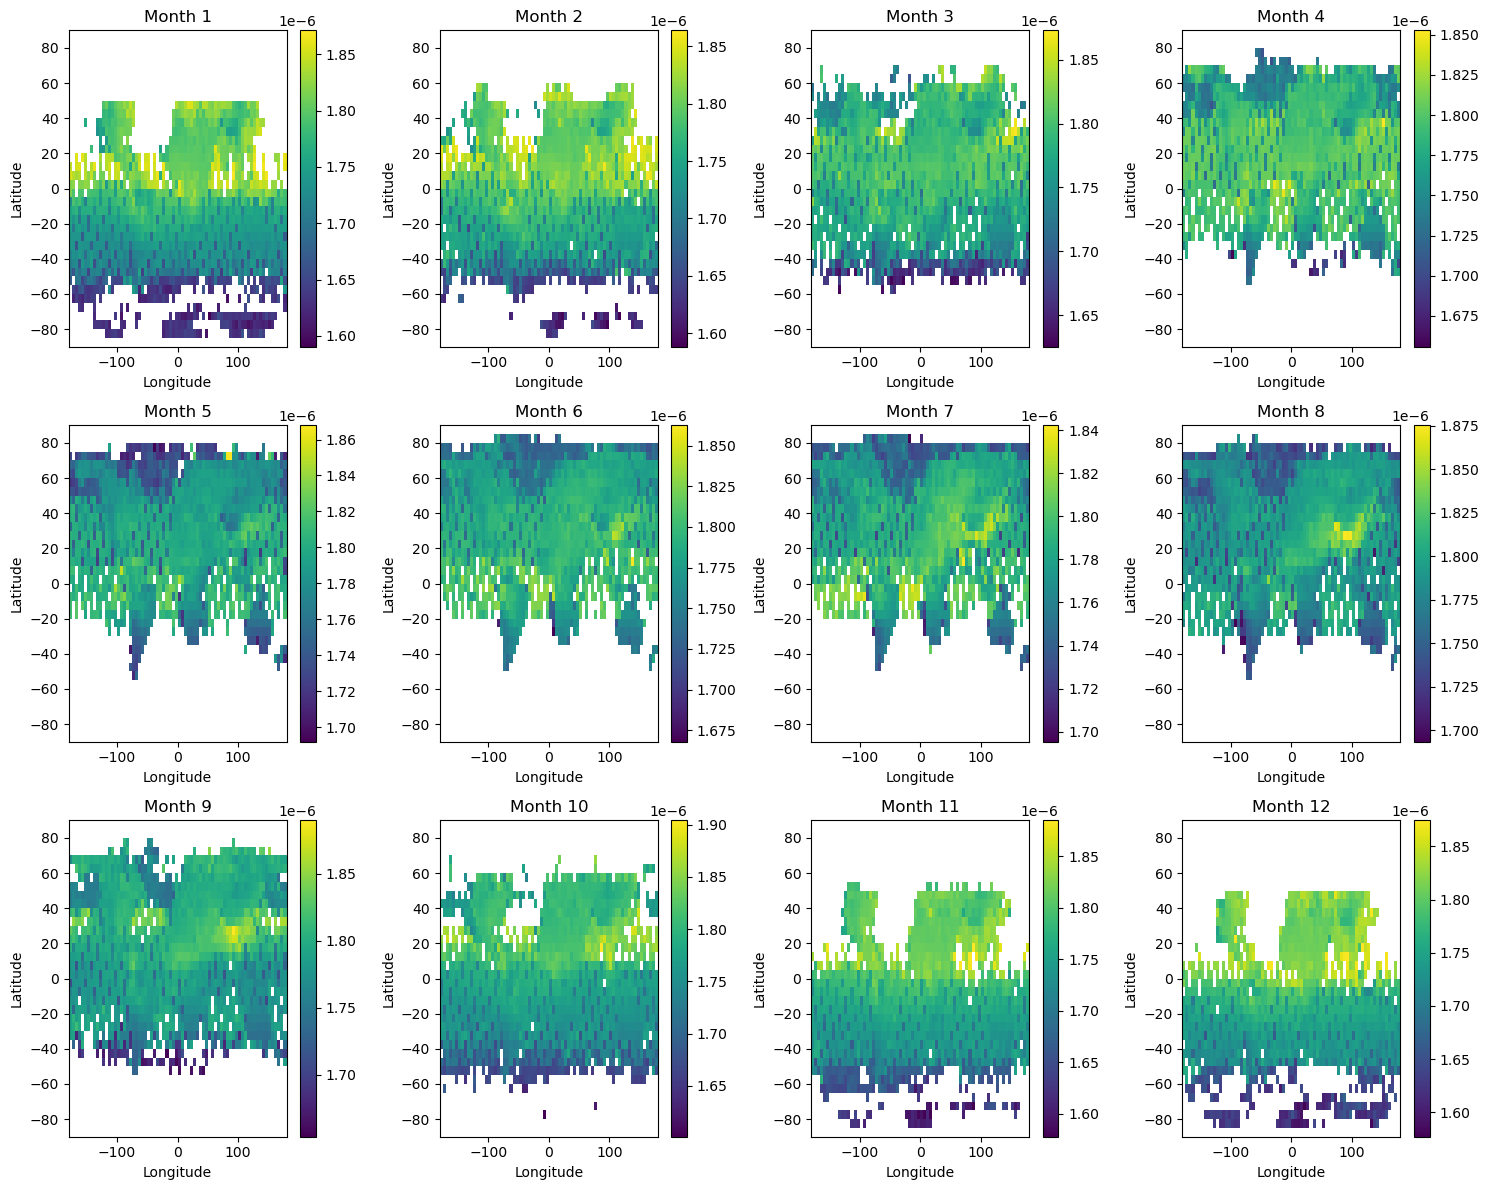

In [8]:
#1.1
# 按月分组，并计算每个月的多年平均
monthly_mean = ds.groupby('time.month').mean(dim='time')

# 创建 12 个面板的图形
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

# 绘制每个月的甲烷气候学
for i, ax in enumerate(axes.flatten()):
    # NOTE: 变量名错误 -1
    # month_data = monthly_avg.isel(month=i)  # 获取每个月的数据
    month_data = monthly_mean.isel(month=i)
    month_data = month_data['xch4']  # 选择 xch4 变量

    # 绘制热图
    c = ax.pcolormesh(month_data['lon'], month_data['lat'], month_data, shading='auto')
    ax.set_title(f'Month {i + 1}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # 添加颜色条
    fig.colorbar(c, ax=ax)

plt.tight_layout()
# plt.savefig("plot3-1-1.png")  # 保存为 PNG 文件
plt.show()

In [10]:
#1.2
# 计算每个网格点的面积权重 (5°x5°网格)，这里只是简单地假设面积相等
lat = ds['lat']
lon = ds['lon']

# 按照纬度和经度的维度计算加权平均
weighted_xch4 = ds['xch4'].mean(dim=('lat', 'lon'))  # 简单平均
# 现在 'weighted_xch4' 是全球每个时间点的平均甲烷浓度

import hvplot.xarray

# 使用 hvplot 直接绘制 xarray 数据的时间序列图
# NOTE: 数据已经乘以了1e-6，因此此处量纲应该为1 -1
plot = weighted_xch4.hvplot(title="Global Average Methane Concentration (2003-2020)",
                            xlabel="Time", ylabel="Methane Concentration (ppb)", width=800, height=400)

plot

:Curve   [time]   (xch4)

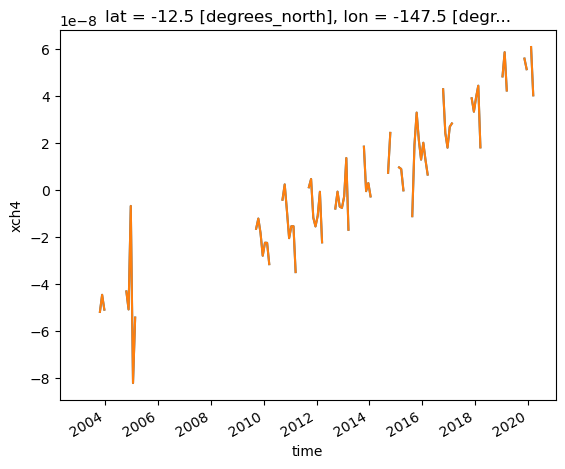

In [12]:
#1.3
# Step 1: 按照月份对甲烷浓度数据进行分组
group_data = ds['xch4'].groupby('time.month')

# Step 2: 计算每个月的多年来的平均值，并减去对应月份的平均值，得到非季节性甲烷浓度
xch4_anom = group_data - group_data.mean(dim='time')

# Step 3: 选择特定点（15°S，150°W）并计算非季节性甲烷浓度的时间序列
# 注意：lat = -15°，lon = -150°
xch4_anom.sel(lon=-150, lat=-15, method='nearest').plot()
plt.show()

# plt.savefig("plot3-1-3.png")  # 保存为 PNG 文件


In [13]:
#PS3-2
# 1. Open the netCDF4 file
ds2 = xr.open_dataset(r"C:\Users\zjm\Desktop\ESE_5023\NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

# Check the data
ds2

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

C:\dev\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


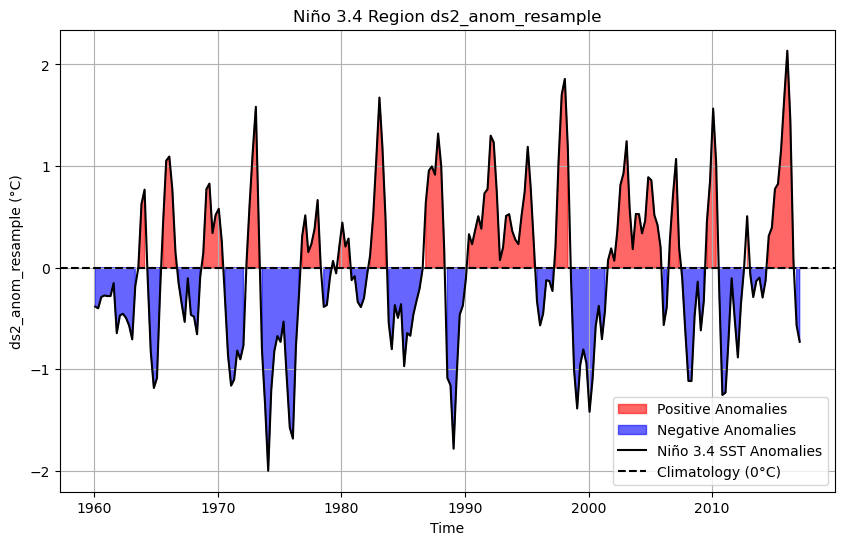

In [14]:
#PS3-2
import xarray as xr
import matplotlib.pyplot as plt

# 选择Niño 3.4区域
# Niño 3.4区域的经纬度范围
lat_range = slice(-5, 5)  # 纬度范围：5N到5S
# NOTE: 数据的经度范围为0-360，因此此处应该选择190-240 -1
lon_range = slice(170, 240)  # 经度范围：170W到120W（即170°W到240°W）

# 提取Niño 3.4区域的SST数据
sst_niño34 = ds2['sst'].sel(lat=lat_range, lon=lon_range)

# 计算每月气候平均值（Climatology）
climatology = sst_niño34.groupby('time.month').mean(dim='time')

# 计算SST异常值
sst_anomalies = sst_niño34.groupby('time.month') - climatology

# Use resample() function at a frequency of 3m
resample_obj = sst_anomalies.resample(time="3M")

# Show the resample object
resample_obj

# Apply mean() function to the resample object and get results
ds2_anom_resample = resample_obj.mean(dim="time")
ds2_anom_resample

#绘制Niño 3.4 SST异常值的时间序列图
# 提取时间和SST异常值
time = ds2_anom_resample['time']
sst_values = ds2_anom_resample.mean(dim=('lat', 'lon'))  # 对纬度和经度求平均值

# 绘制图形
plt.figure(figsize=(10, 6))

# 填充大于0的SST异常值区域（红色）
plt.fill_between(time, sst_values, where=(sst_values > 0), color='red', alpha=0.6, label='Positive Anomalies')

# 填充小于0的SST异常值区域（蓝色）
plt.fill_between(time, sst_values, where=(sst_values < 0), color='blue', alpha=0.6, label='Negative Anomalies')

# 绘制SST异常值曲线
plt.plot(time, sst_values, color='black', label='Niño 3.4 SST Anomalies')

# 添加0°C的参考线
plt.axhline(y=0, color='k', linestyle='--', label='Climatology (0°C)')

# 添加图表标题和标签
plt.xlabel('Time')
plt.ylabel('ds2_anom_resample (°C)')
plt.title('Niño 3.4 Region ds2_anom_resample')

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.savefig('PS3-2-2.png')
plt.show()

<xarray.Dataset>
Dimensions:   (lat: 361, lon: 576, time: 86)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2015-01-16T12:00:00 ... 2022-02-15
Data variables:
    XCO2      (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    XCO2PREC  (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/25)
    RangeBeginningDate:             2017-08-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2017-08-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-03-15T12:04:33Z
    History:                        Original file generated: Tue Mar 15 12:04...
    ShortName:     

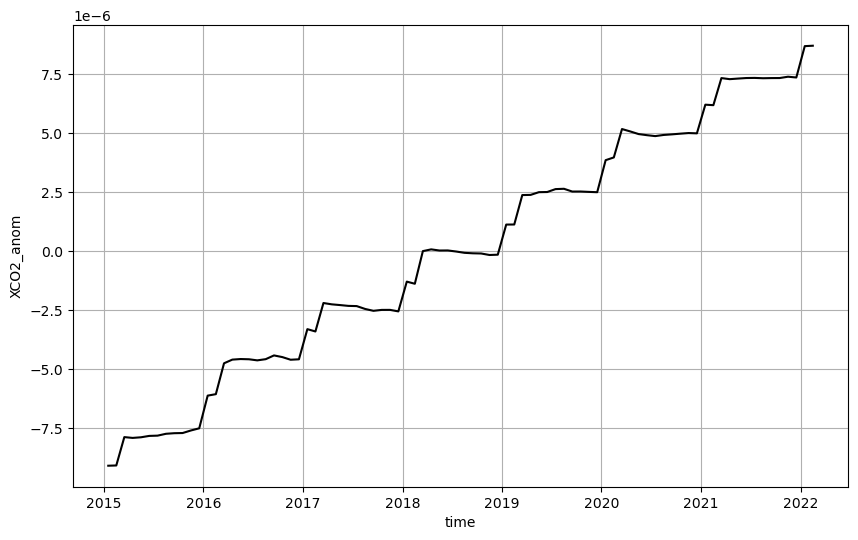

In [157]:
#PS3-3
#3.1
import matplotlib.pyplot as plt
import xarray as xr

# 1. 打开 netCDF 文件
ds3 = xr.open_mfdataset(r'D:\ESE5023\output_file\oco2_GEOS_L3CO2_month_*.nc4', engine="netcdf4")

print(ds3)

# 获取 XCO2 变量
XCO2 = ds3['XCO2']

# 计算每月的气候平均值（季节性周期）
climatology = XCO2.groupby('time.month').mean(dim='time')

# 计算去除季节性变化后的 XCO2 异常
XCO2_anomaly = XCO2.groupby('time.month') - climatology

# 对时间维度进行空间平均，得到一个时间序列（只包含时间）
XCO2_anomaly_mean = XCO2_anomaly.mean(dim=('lat', 'lon'))

# 绘制去除季节性变化后的 XCO2 时间序列
plt.figure(figsize=(10, 6))
plt.plot(XCO2_anomaly_mean['time'], XCO2_anomaly_mean, color='black')
plt.xlabel('time')
plt.ylabel('XCO2_anom')
plt.grid(True)
plt.savefig('PS3-3-1')
plt.show()

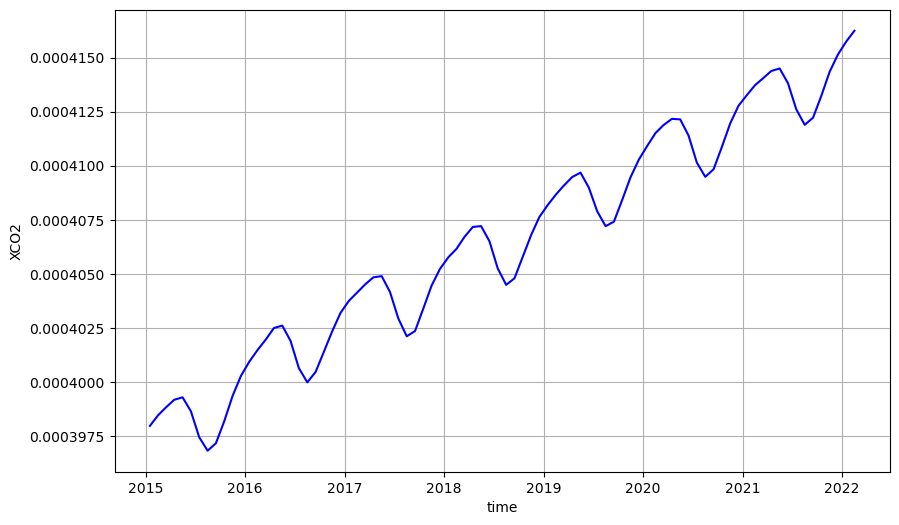

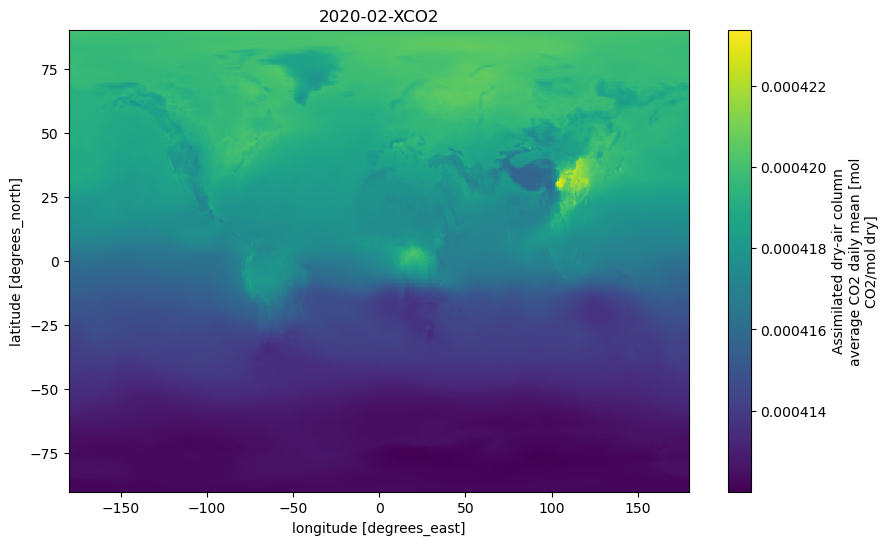

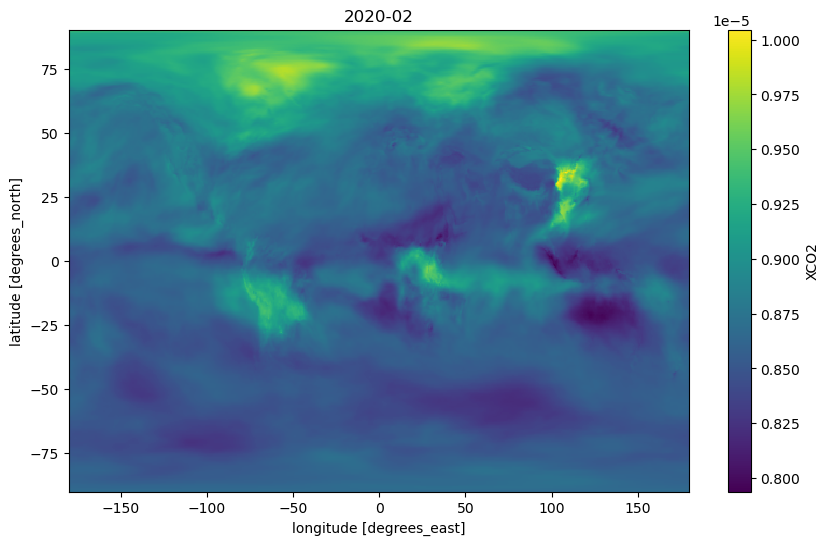

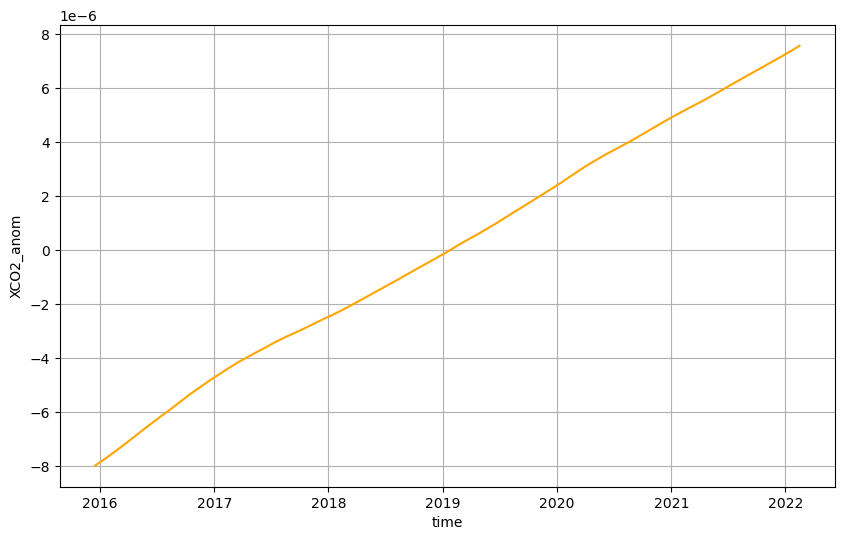

:Curve   [time]   (XCO2_anom)

In [165]:
#3.2
# NOTE: 注意是绘制五种不同类型的图，此处只有两种 -3
plt.figure(figsize=(10, 6))
plt.plot(XCO2['time'], XCO2.mean(dim=('lat', 'lon')), color='blue')
plt.xlabel('time')
plt.ylabel('XCO2')
plt.grid(True)
plt.savefig('PS3-3-2-1')
plt.show()

plt.figure(figsize=(10, 6))
XCO2.sel(time='2022-02-15').plot()
plt.title('2020-02-XCO2')
plt.savefig('PS3-3-2-2')
plt.show()

plt.figure(figsize=(10, 6))
XCO2_anomaly.sel(time='2022-02-15').plot()
plt.title('2020-02')
plt.savefig('PS3-3-2-3')
plt.show()

XCO2_smooth = XCO2_anomaly_mean.rolling(time=12).mean()  # 12个月滚动平均
plt.figure(figsize=(10, 6))
plt.plot(XCO2_smooth['time'], XCO2_smooth, color='orange')
plt.xlabel('time')
plt.ylabel('XCO2_anom')
plt.grid(True)
plt.savefig('PS3-3-2-4')
plt.show()

import hvplot.xarray  # 导入 hvplot 扩展
# 将 xarray 数据转换为 pandas DataFrame 格式
XCO2_anomaly_mean_df = XCO2_anomaly_mean.to_dataframe(name='XCO2_anom').reset_index()
# 使用 hvplot 绘制交互式图表
XCO2_anomaly_mean_df.hvplot(x='time', y='XCO2_anom', xlabel='time', ylabel='XCO2_anom', line_width=2)